# **Crime's Rate Project**

Data Features  :
* **Dates** - timestamp of the crime incident
* **Category** - category of the crime incident (only in train.csv)
* **Descript** - detailed description of the crime incident (only in train.csv)
* **DayOfWeek** - the day of the week
* **PdDistrict** - name of the Police Department District
* **Resolution** - how the crime incident was resolved (only in train.csv)
* **Address** - the approximate street address of the crime incident
* **X** - Longitude
* **Y** - Latitude

# **Importing Required Libraries and Uploading Data**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn_extra.cluster import KMedoids
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

In [3]:
uploaded=files.upload()

In [4]:
df_train=pd.read_csv('/content/Crime Train Data.csv')

In [5]:
df_test=pd.read_csv('/content/Crime Test Data.csv')

In [2]:
df_train= pd.read_csv('C:/Users/DELL/Downloads/train.csv')

In [3]:
df_test=pd.read_csv('C:/Users/DELL/Downloads/test.csv')

# **Data Preprocessing**

## **Exploration and Cleaning of Training Data Set:**

In [4]:
df_train.shape

(878049, 9)

In [5]:
print(f'columns : {df_train.columns.tolist()}')

columns : ['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y']


In [6]:
df_train.rename(columns={'X':'Longitude','Y':'Latitude'},inplace=True)   # Renaming X , Y columns

In [7]:
print("first 5 rows of training data : ")
df_train.head()

first 5 rows of training data : 


Dates        Category                      Descript  DayOfWeek  \
0  5/13/2015 23:53        WARRANTS                WARRANT ARREST  Wednesday   
1  5/13/2015 23:53  OTHER OFFENSES      TRAFFIC VIOLATION ARREST  Wednesday   
2  5/13/2015 23:33  OTHER OFFENSES      TRAFFIC VIOLATION ARREST  Wednesday   
3  5/13/2015 23:30   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO  Wednesday   
4  5/13/2015 23:30   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO  Wednesday   

  PdDistrict      Resolution                    Address   Longitude   Latitude  
0   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892  37.774599  
1   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892  37.774599  
2   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363  37.800414  
3   NORTHERN            NONE   1500 Block of LOMBARD ST -122.426995  37.800873  
4       PARK            NONE  100 Block of BRODERICK ST -122.438738  37.771541

In [8]:
print("The last 5 rows of training data : ")
df_train.tail()

The last 5 rows of training data : 


Dates                Category  \
878044  1/6/2003 0:15                 ROBBERY   
878045  1/6/2003 0:01           LARCENY/THEFT   
878046  1/6/2003 0:01           LARCENY/THEFT   
878047  1/6/2003 0:01               VANDALISM   
878048  1/6/2003 0:01  FORGERY/COUNTERFEITING   

                                         Descript DayOfWeek PdDistrict  \
878044           ROBBERY ON THE STREET WITH A GUN    Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO    Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO    Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES    Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)    Monday    BAYVIEW   

       Resolution                     Address   Longitude   Latitude  
878044       NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056  
878045       NONE        600 Block of EDNA ST -122.447363  37.731948  
878046       NONE          5TH ST / FOLSOM ST -122.403390  37.780266  
878047       NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607  
878048       NONE    1800 Block of NEWCOMB AV -122.394926  37.738212

In [9]:
df_train.sample(5)

Dates        Category                         Descript  \
824563  9/18/2003 18:20        TRESPASS                      TRESPASSING   
133930   8/6/2013 12:00   LARCENY/THEFT      GRAND THEFT FROM A BUILDING   
266570  10/4/2011 14:50  MISSING PERSON                     FOUND PERSON   
714226   4/4/2005 10:29        WARRANTS  ENROUTE TO OUTSIDE JURISDICTION   
792262   3/1/2004 16:10   LARCENY/THEFT          GRAND THEFT SHOPLIFTING   

       DayOfWeek  PdDistrict      Resolution                   Address  \
824563  Thursday    SOUTHERN   ARREST, CITED   600 Block of BRANNAN ST   
133930   Tuesday        PARK            NONE      0 Block of RIVOLI ST   
266570   Tuesday     MISSION         LOCATED  1000 Block of POTRERO AV   
714226    Monday    NORTHERN  ARREST, BOOKED   LARKIN ST / OFARRELL ST   
792262    Monday  TENDERLOIN  ARREST, BOOKED  100 Block of STOCKTON ST   

         Longitude   Latitude  
824563 -122.399939  37.775711  
133930 -122.448637  37.762546  
266570 -122.406539  37.756486  
714226 -122.417904  37.785167  
792262 -122.406428  37.787109

In [10]:
df_train.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
Longitude     float64
Latitude      float64
dtype: object

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   Longitude   878049 non-null  float64
 8   Latitude    878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [12]:
# converting values in dates to datetime
#Extracting year,month,day,hour from dates
df_train['Dates']=pd.to_datetime(df_train['Dates'])
df_train['Year']=df_train['Dates'].dt.year
df_train['Month']=df_train['Dates'].dt.month
df_train['Day']=df_train['Dates'].dt.day
df_train['Hour']=df_train['Dates'].dt.hour

In [13]:
df_train=df_train.drop('Dates',axis=1)  #Dropping dates column after extraction

In [14]:
df_train.dtypes

Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
Longitude     float64
Latitude      float64
Year            int32
Month           int32
Day             int32
Hour            int32
dtype: object

In [15]:
df_train.isna().sum()
#There is no na values

Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
Longitude     0
Latitude      0
Year          0
Month         0
Day           0
Hour          0
dtype: int64

In [16]:
df_train.duplicated().any()

True

In [17]:
df_train.duplicated().sum()

4658

In [18]:
df_train=df_train.drop_duplicates() #Dropping the duplicated rows

In [23]:
df_train

Category                                   Descript  \
0                     WARRANTS                             WARRANT ARREST   
1               OTHER OFFENSES                   TRAFFIC VIOLATION ARREST   
2               OTHER OFFENSES                   TRAFFIC VIOLATION ARREST   
3                LARCENY/THEFT               GRAND THEFT FROM LOCKED AUTO   
4                LARCENY/THEFT               GRAND THEFT FROM LOCKED AUTO   
...                        ...                                        ...   
878044                 ROBBERY           ROBBERY ON THE STREET WITH A GUN   
878045           LARCENY/THEFT               GRAND THEFT FROM LOCKED AUTO   
878046           LARCENY/THEFT               GRAND THEFT FROM LOCKED AUTO   
878047               VANDALISM  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES   
878048  FORGERY/COUNTERFEITING                   CHECKS, FORGERY (FELONY)   

        DayOfWeek PdDistrict      Resolution                     Address  \
0       Wednesday   NORTHERN  ARREST, BOOKED          OAK ST / LAGUNA ST   
1       Wednesday   NORTHERN  ARREST, BOOKED          OAK ST / LAGUNA ST   
2       Wednesday   NORTHERN  ARREST, BOOKED   VANNESS AV / GREENWICH ST   
3       Wednesday   NORTHERN            NONE    1500 Block of LOMBARD ST   
4       Wednesday       PARK            NONE   100 Block of BRODERICK ST   
...           ...        ...             ...                         ...   
878044     Monday    TARAVAL            NONE  FARALLONES ST / CAPITOL AV   
878045     Monday  INGLESIDE            NONE        600 Block of EDNA ST   
878046     Monday   SOUTHERN            NONE          5TH ST / FOLSOM ST   
878047     Monday   SOUTHERN            NONE        TOWNSEND ST / 2ND ST   
878048     Monday    BAYVIEW            NONE    1800 Block of NEWCOMB AV   

         Longitude   Latitude  Year  Month  Day  Hour  
0      -122.425892  37.774599  2015      5   13    23  
1      -122.425892  37.774599  2015      5   13    23  
2      -122.424363  37.800414  2015      5   13    23  
3      -122.426995  37.800873  2015      5   13    23  
4      -122.438738  37.771541  2015      5   13    23  
...            ...        ...   ...    ...  ...   ...  
878044 -122.459033  37.714056  2003      1    6     0  
878045 -122.447363  37.731948  2003      1    6     0  
878046 -122.403390  37.780266  2003      1    6     0  
878047 -122.390531  37.780607  2003      1    6     0  
878048 -122.394926  37.738212  2003      1    6     0  

[873391 rows x 12 columns]

In [19]:
df_train=df_train.reset_index(drop=True)

In [20]:
df_train.shape

(873391, 12)

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873391 entries, 0 to 873390
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    873391 non-null  object 
 1   Descript    873391 non-null  object 
 2   DayOfWeek   873391 non-null  object 
 3   PdDistrict  873391 non-null  object 
 4   Resolution  873391 non-null  object 
 5   Address     873391 non-null  object 
 6   Longitude   873391 non-null  float64
 7   Latitude    873391 non-null  float64
 8   Year        873391 non-null  int32  
 9   Month       873391 non-null  int32  
 10  Day         873391 non-null  int32  
 11  Hour        873391 non-null  int32  
dtypes: float64(2), int32(4), object(6)
memory usage: 66.6+ MB


In [22]:
df_train.describe()
#Langitude,Latitude columns Contain Extreme Values

Longitude       Latitude           Year          Month  \
count  873391.000000  873391.000000  873391.000000  873391.000000   
mean     -122.422639      37.771028    2008.712930       6.436067   
std         0.030384       0.458107       3.630581       3.429044   
min      -122.513642      37.707879    2003.000000       1.000000   
25%      -122.432957      37.752409    2006.000000       3.000000   
50%      -122.416446      37.775421    2009.000000       6.000000   
75%      -122.406970      37.784372    2012.000000       9.000000   
max      -120.500000      90.000000    2015.000000      12.000000   

                 Day           Hour  
count  873391.000000  873391.000000  
mean       15.573364      13.409799  
std         8.783104       6.549561  
min         1.000000       0.000000  
25%         8.000000       9.000000  
50%        16.000000      14.000000  
75%        23.000000      19.000000  
max        31.000000      23.000000

In [23]:
df_train.nunique()

Category         39
Descript        879
DayOfWeek         7
PdDistrict       10
Resolution       17
Address       23228
Longitude     28339
Latitude      28696
Year             13
Month            12
Day              31
Hour             24
dtype: int64

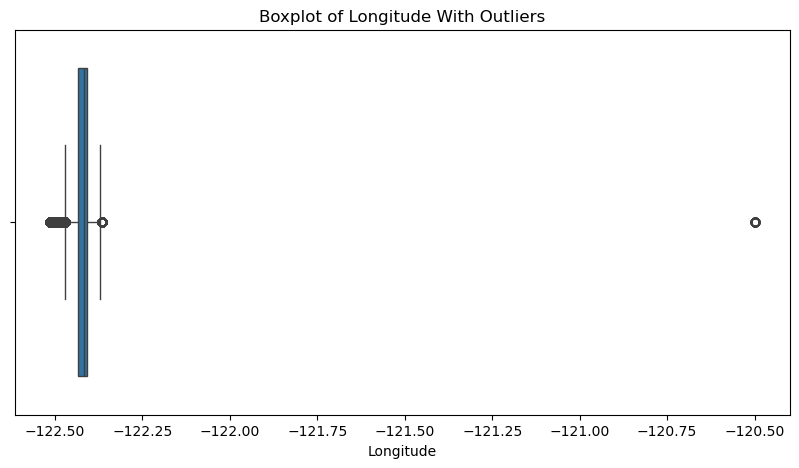

In [24]:
#Drawing boxplot for longitude column
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['Longitude'])
plt.title('Boxplot of Longitude With Outliers')
plt.show()

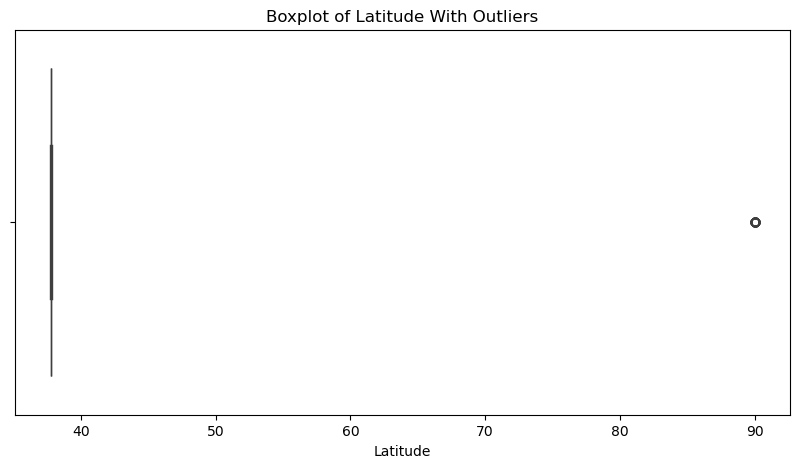

In [26]:
#Drawing boxplot for the latitude column
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['Latitude'])
plt.title('Boxplot of Latitude With Outliers')
plt.show()

In [27]:
#Detecting the outliers
Q1_long=df_train['Longitude'].quantile(0.25)
Q3_long=df_train['Longitude'].quantile(0.75)
IQR_long=Q3_long-Q1_long
Q1_lat=df_train['Latitude'].quantile(0.25)
Q3_lat=df_train['Latitude'].quantile(0.75)
IQR_lat=Q3_lat-Q1_lat
df_cleaned_train=df_train[(df_train['Longitude']>=(Q1_long-1.5*IQR_long))&
 (df_train['Longitude']<=(Q3_long+1.5*IQR_long))&
 (df_train['Latitude']>=(Q1_lat-1.5*IQR_lat))&
 (df_train['Latitude']<=(Q3_lat+1.5*IQR_lat))]

In [28]:
df_cleaned_train.shape

(813342, 12)

In [36]:
#Counting the number of incidents for each crime category
df_train['Category'].value_counts()

Category
LARCENY/THEFT                  173911
OTHER OFFENSES                 125411
NON-CRIMINAL                    91635
ASSAULT                         76758
DRUG/NARCOTIC                   53718
VEHICLE THEFT                   53703
VANDALISM                       44540
WARRANTS                        42083
BURGLARY                        36561
SUSPICIOUS OCC                  31373
MISSING PERSON                  25615
ROBBERY                         22977
FRAUD                           16628
FORGERY/COUNTERFEITING          10580
SECONDARY CODES                  9974
WEAPON LAWS                      8545
TRESPASS                         7297
PROSTITUTION                     6979
STOLEN PROPERTY                  4534
SEX OFFENSES FORCIBLE            4378
DISORDERLY CONDUCT               4296
DRUNKENNESS                      4266
RECOVERED VEHICLE                3130
KIDNAPPING                       2340
DRIVING UNDER THE INFLUENCE      2267
RUNAWAY                          1889
LIQ

## **Exploration and Cleaning Of Testing Data:**

In [29]:
print("The shape of testing data : ")
df_test.shape

The shape of testing data : 


(884262, 7)

In [30]:
print(f'columns : {df_test.columns.tolist()}')

columns : ['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y']


In [31]:
df_test.rename(columns={'X':'Longitude','Y':'Latitude'},inplace=True)

In [32]:
print("The first 5 rows of the testing data : ")
df_test.head()

The first 5 rows of the testing data : 


Id            Dates DayOfWeek PdDistrict                   Address  \
0   0  5/10/2015 23:59    Sunday    BAYVIEW   2000 Block of THOMAS AV   
1   1  5/10/2015 23:51    Sunday    BAYVIEW        3RD ST / REVERE AV   
2   2  5/10/2015 23:50    Sunday   NORTHERN    2000 Block of GOUGH ST   
3   3  5/10/2015 23:45    Sunday  INGLESIDE  4700 Block of MISSION ST   
4   4  5/10/2015 23:45    Sunday  INGLESIDE  4700 Block of MISSION ST   

    Longitude   Latitude  
0 -122.399588  37.735051  
1 -122.391523  37.732432  
2 -122.426002  37.792212  
3 -122.437394  37.721412  
4 -122.437394  37.721412

In [33]:
print("The last 5 rows of the testing data : ")
df_test.tail()

The last 5 rows of the testing data : 


Id          Dates  DayOfWeek PdDistrict  \
884257  884257  1/1/2003 0:01  Wednesday    MISSION   
884258  884258  1/1/2003 0:01  Wednesday   NORTHERN   
884259  884259  1/1/2003 0:01  Wednesday  INGLESIDE   
884260  884260  1/1/2003 0:01  Wednesday    BAYVIEW   
884261  884261  1/1/2003 0:01  Wednesday    TARAVAL   

                            Address   Longitude   Latitude  
884257      2600 Block of BRYANT ST -122.408983  37.751987  
884258  1900 Block of WASHINGTON ST -122.425342  37.792681  
884259     5500 Block of MISSION ST -122.445418  37.712075  
884260      1500 Block of HUDSON AV -122.387394  37.739479  
884261       1500 Block of SLOAT BL -122.489714  37.733950

In [34]:
df_test.sample(5)

Id             Dates  DayOfWeek PdDistrict  \
329485  329485   10/15/2010 9:30     Friday  INGLESIDE   
272040  272040    8/31/2011 9:32  Wednesday    MISSION   
368098  368098   3/18/2010 12:30   Thursday    TARAVAL   
261741  261741  10/25/2011 18:00    Tuesday    CENTRAL   
439820  439820    3/13/2009 9:30     Friday    BAYVIEW   

                           Address   Longitude   Latitude  
329485   1000 Block of SAN JOSE AV -122.425586  37.737004  
272040     900 Block of POTRERO AV -122.406605  37.757158  
368098  200 Block of WESTPORTAL AV -122.468118  37.738900  
261741     800 Block of PACIFIC AV -122.409061  37.796679  
439820     700 Block of JERROLD AV -122.373456  37.729680

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   Longitude   884262 non-null  float64
 6   Latitude    884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [36]:
df_test.dtypes

Id              int64
Dates          object
DayOfWeek      object
PdDistrict     object
Address        object
Longitude     float64
Latitude      float64
dtype: object

In [37]:
#Splitting the dates column to have better insights of the data
df_test['Dates']=pd.to_datetime(df_test['Dates'])
df_test['Year']=df_test['Dates'].dt.year
df_test['Month']=df_test['Dates'].dt.month
df_test['Day']=df_test['Dates'].dt.day
df_test['Hour']=df_test['Dates'].dt.hour
df_test=df_test.drop('Dates',axis=1)

In [38]:
df_test.dtypes

Id              int64
DayOfWeek      object
PdDistrict     object
Address        object
Longitude     float64
Latitude      float64
Year            int32
Month           int32
Day             int32
Hour            int32
dtype: object

In [39]:
df_test.nunique()

Id            884262
DayOfWeek          7
PdDistrict        10
Address        23184
Longitude      28407
Latitude       28752
Year              13
Month             12
Day               31
Hour              24
dtype: int64

In [40]:
df_test.isna().sum()

Id            0
DayOfWeek     0
PdDistrict    0
Address       0
Longitude     0
Latitude      0
Year          0
Month         0
Day           0
Hour          0
dtype: int64

In [41]:
df_test.duplicated().any()

False

In [42]:
df_test.duplicated().sum()

0

In [43]:
df_test=df_test.reset_index(drop=True)

In [44]:
df_test.head()

Id DayOfWeek PdDistrict                   Address   Longitude   Latitude  \
0   0    Sunday    BAYVIEW   2000 Block of THOMAS AV -122.399588  37.735051   
1   1    Sunday    BAYVIEW        3RD ST / REVERE AV -122.391523  37.732432   
2   2    Sunday   NORTHERN    2000 Block of GOUGH ST -122.426002  37.792212   
3   3    Sunday  INGLESIDE  4700 Block of MISSION ST -122.437394  37.721412   
4   4    Sunday  INGLESIDE  4700 Block of MISSION ST -122.437394  37.721412   

   Year  Month  Day  Hour  
0  2015      5   10    23  
1  2015      5   10    23  
2  2015      5   10    23  
3  2015      5   10    23  
4  2015      5   10    23

In [45]:
df_test.describe()
#From describe results there are extreme values in the Latitude and Longitude Columns

Id      Longitude       Latitude           Year  \
count  884262.000000  884262.000000  884262.000000  884262.000000   
mean   442130.500000    -122.422693      37.771476    2008.703743   
std    255264.596206       0.030985       0.484824       3.637850   
min         0.000000    -122.513642      37.707879    2003.000000   
25%    221065.250000    -122.433069      37.752374    2005.000000   
50%    442130.500000    -122.416517      37.775421    2009.000000   
75%    663195.750000    -122.406959      37.784353    2012.000000   
max    884261.000000    -120.500000      90.000000    2015.000000   

               Month            Day           Hour  
count  884262.000000  884262.000000  884262.000000  
mean        6.314065      15.650294      13.396023  
std         3.467064       8.874769       6.558899  
min         1.000000       1.000000       0.000000  
25%         3.000000       8.000000       9.000000  
50%         6.000000      16.000000      14.000000  
75%         9.000000      23.000000      19.000000  
max        12.000000      31.000000      23.000000

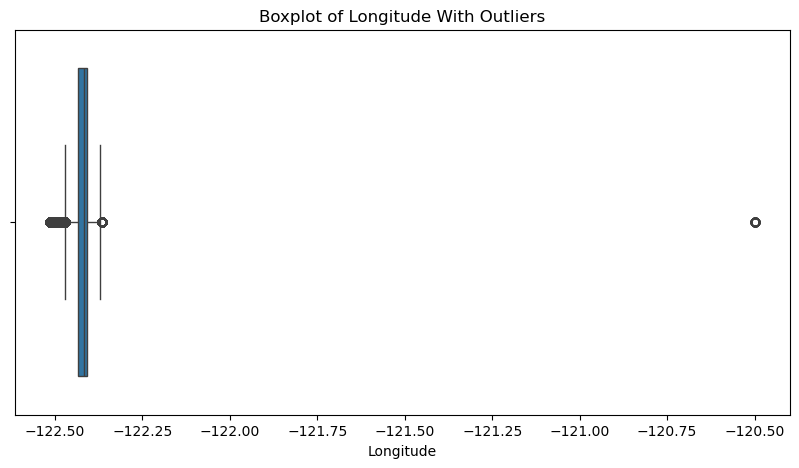

In [46]:
#Drawing a boxplot for Latitude Column
plt.figure(figsize=(10,5))
sns.boxplot(x=df_test['Longitude'])
plt.title('Boxplot of Longitude With Outliers')
plt.show()

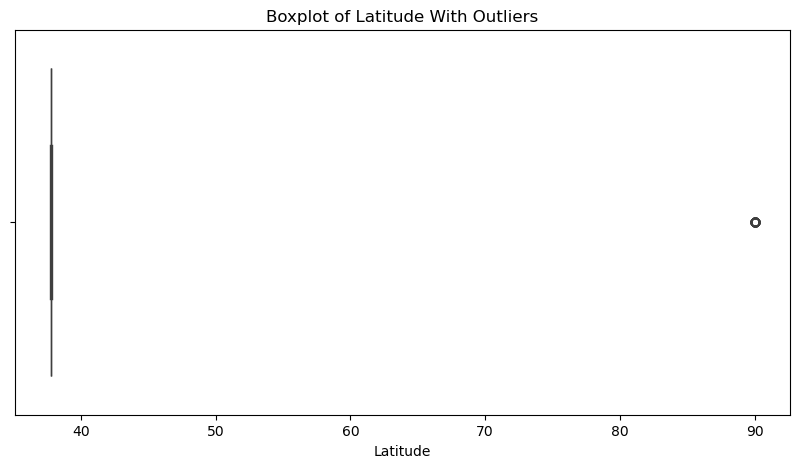

In [48]:
#Drawing Boxplot for Latitude Column
plt.figure(figsize=(10,5))
sns.boxplot(x=df_test['Latitude'])
plt.title('Boxplot of Latitude With Outliers')
plt.show()

In [49]:
#Detecting the exteme values
Q1_long_test=df_test['Longitude'].quantile(0.25)
Q3_long_test=df_test['Longitude'].quantile(0.75)
IQR_long_test=Q3_long_test-Q1_long_test
Q1_lat_test=df_test['Latitude'].quantile(0.25)
Q3_lat_test=df_test['Latitude'].quantile(0.75)
IQR_lat_test=Q3_lat_test-Q1_lat_test
df_cleaned_test=df_test[(df_test['Longitude']>=(Q1_long_test-1.5*IQR_long_test))&
 (df_test['Longitude']<=(Q3_long_test+1.5*IQR_long_test))&
 (df_test['Latitude']>=(Q1_lat_test-1.5*IQR_lat_test))&
 (df_test['Latitude']<=(Q3_lat_test+1.5*IQR_lat_test))]


In [50]:
print("The shape of  test data set after cleaning : ")
df_cleaned_test.shape

The shape of  test data set after cleaning : 


(823506, 10)

In [51]:
df_cleaned_train.to_csv('cleaned_train.csv',index=False)

In [52]:
df_cleaned_test.to_csv('cleaned_test.csv',index=False)

# **Data Visualization**

In [53]:
df_vis=df_cleaned_train.copy()
df_vis

Category                                   Descript  \
0                     WARRANTS                             WARRANT ARREST   
1               OTHER OFFENSES                   TRAFFIC VIOLATION ARREST   
2               OTHER OFFENSES                   TRAFFIC VIOLATION ARREST   
3                LARCENY/THEFT               GRAND THEFT FROM LOCKED AUTO   
4                LARCENY/THEFT               GRAND THEFT FROM LOCKED AUTO   
...                        ...                                        ...   
873386                 ROBBERY           ROBBERY ON THE STREET WITH A GUN   
873387           LARCENY/THEFT               GRAND THEFT FROM LOCKED AUTO   
873388           LARCENY/THEFT               GRAND THEFT FROM LOCKED AUTO   
873389               VANDALISM  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES   
873390  FORGERY/COUNTERFEITING                   CHECKS, FORGERY (FELONY)   

        DayOfWeek PdDistrict      Resolution                     Address  \
0       Wednesday   NORTHERN  ARREST, BOOKED          OAK ST / LAGUNA ST   
1       Wednesday   NORTHERN  ARREST, BOOKED          OAK ST / LAGUNA ST   
2       Wednesday   NORTHERN  ARREST, BOOKED   VANNESS AV / GREENWICH ST   
3       Wednesday   NORTHERN            NONE    1500 Block of LOMBARD ST   
4       Wednesday       PARK            NONE   100 Block of BRODERICK ST   
...           ...        ...             ...                         ...   
873386     Monday    TARAVAL            NONE  FARALLONES ST / CAPITOL AV   
873387     Monday  INGLESIDE            NONE        600 Block of EDNA ST   
873388     Monday   SOUTHERN            NONE          5TH ST / FOLSOM ST   
873389     Monday   SOUTHERN            NONE        TOWNSEND ST / 2ND ST   
873390     Monday    BAYVIEW            NONE    1800 Block of NEWCOMB AV   

         Longitude   Latitude  Year  Month  Day  Hour  
0      -122.425892  37.774599  2015      5   13    23  
1      -122.425892  37.774599  2015      5   13    23  
2      -122.424363  37.800414  2015      5   13    23  
3      -122.426995  37.800873  2015      5   13    23  
4      -122.438738  37.771541  2015      5   13    23  
...            ...        ...   ...    ...  ...   ...  
873386 -122.459033  37.714056  2003      1    6     0  
873387 -122.447363  37.731948  2003      1    6     0  
873388 -122.403390  37.780266  2003      1    6     0  
873389 -122.390531  37.780607  2003      1    6     0  
873390 -122.394926  37.738212  2003      1    6     0  

[813342 rows x 12 columns]

## Frequency of Crime Categories  


This horizontal bar chart illustrates the frequency of each crime category reported. Categories are sorted in descending order based on their occurrence, providing a clear view of which types of crimes are most and least common in the dataset. The 'rocket' color palette adds a sleek, professional tone to the visualization.


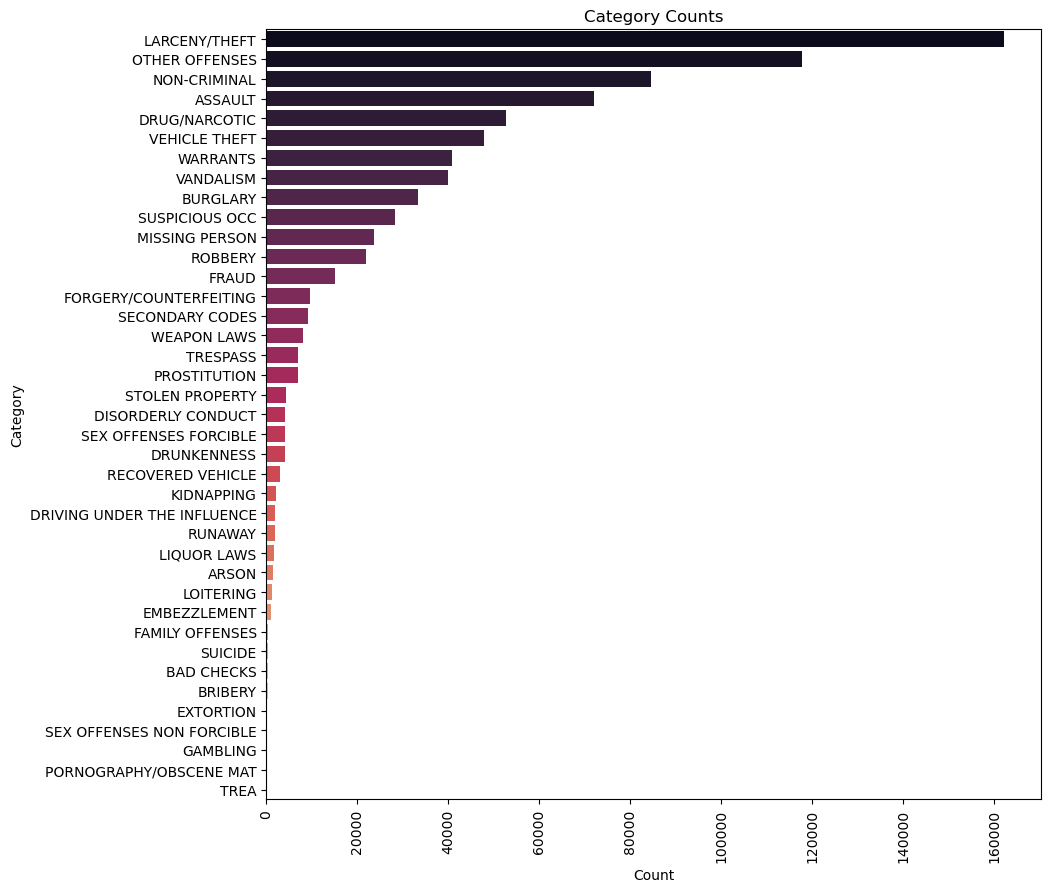

In [54]:
plt.figure(figsize=(10, 10))
sns.countplot(y='Category', data=df_vis, order=df_vis['Category'].value_counts().index,palette='rocket')
plt.title('Category Counts')
plt.xlabel('Count')
plt.ylabel('Category')
plt.xticks(rotation=90)
plt.show()

## Crime Count by Police District and Category  


This grouped bar chart displays the distribution of crime counts across different police districts in San Francisco, segmented by crime category. The gradient of dark to bright reds and blacks visually distinguishes each category, emphasizing both the prevalence and variety of crimes in each district.


In [55]:
crime_per_pd=df_vis.groupby(['PdDistrict','Category']).size().reset_index(name='Count')
crime_per_pd

PdDistrict       Category  Count
0       BAYVIEW          ARSON    393
1       BAYVIEW        ASSAULT   9834
2       BAYVIEW     BAD CHECKS     34
3       BAYVIEW        BRIBERY     56
4       BAYVIEW       BURGLARY   3900
..          ...            ...    ...
376  TENDERLOIN       TRESPASS   1183
377  TENDERLOIN      VANDALISM   1610
378  TENDERLOIN  VEHICLE THEFT   1003
379  TENDERLOIN       WARRANTS   7307
380  TENDERLOIN    WEAPON LAWS    793

[381 rows x 3 columns]

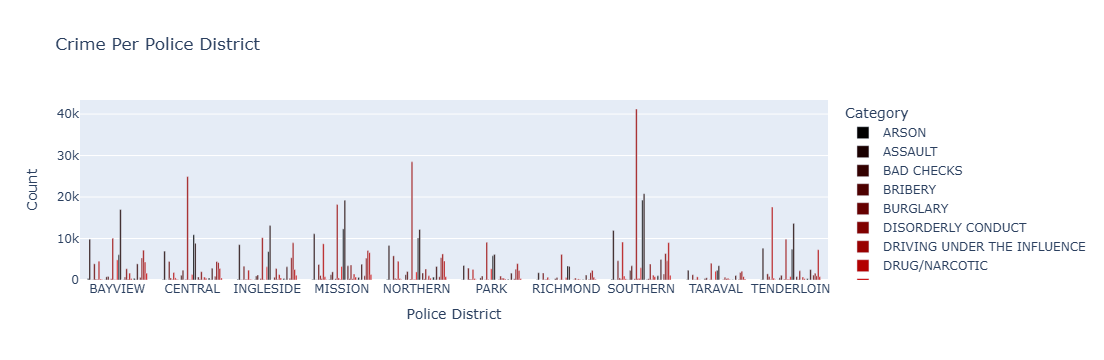

In [56]:
color_list = ["#000000","#1a0000","#330000","#4d0000","#660000","#800000","#990000","#b30000","#cc0000","#e60000"]

fig = px.bar(crime_per_pd, x='PdDistrict', y='Count', color='Category', barmode='group',
             title='Crime Per Police District',
             labels={'PdDistrict': 'Police District', 'Count': 'Count', 'Category': 'Category'},
             color_discrete_sequence=color_list)

fig.show()

## Yearly Crime Trends in San Francisco  


This line plot illustrates the total number of crimes reported each year. The brown line highlights how crime frequency has fluctuated over time, helping identify years with spikes or drops in overall crime activity.


In [57]:
crime_year=df_vis.groupby(['Year'])['Category'].count().reset_index().rename(columns={'Category':'Count'})
crime_year

Year  Count
0   2003  68423
1   2004  67576
2   2005  65363
3   2006  64980
4   2007  63306
5   2008  64977
6   2009  64112
7   2010  61913
8   2011  61803
9   2012  66388
10  2013  70134
11  2014  69064
12  2015  25303

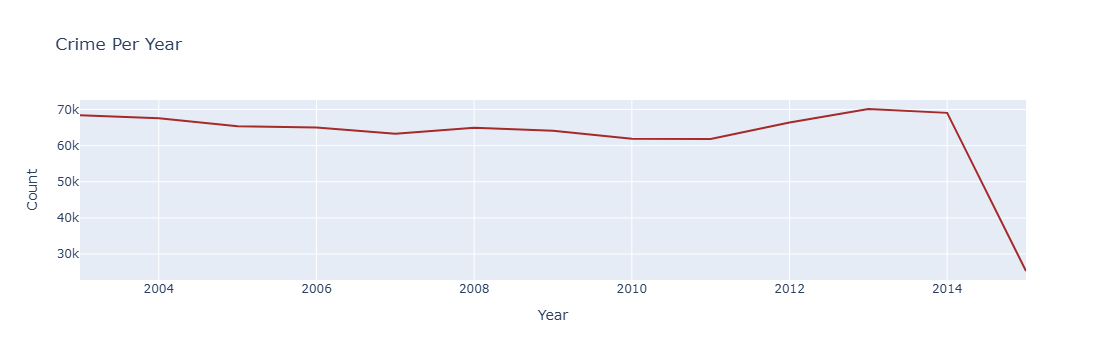

In [58]:
px.line(crime_year, x='Year', y='Count', title='Crime Per Year',color_discrete_sequence=['brown'])

## Crime Category Distribution Across San Francisco  


This scatter map visualizes the geographical distribution of crime incidents in San Francisco, where each point represents a reported crime and its color indicates the crime category.


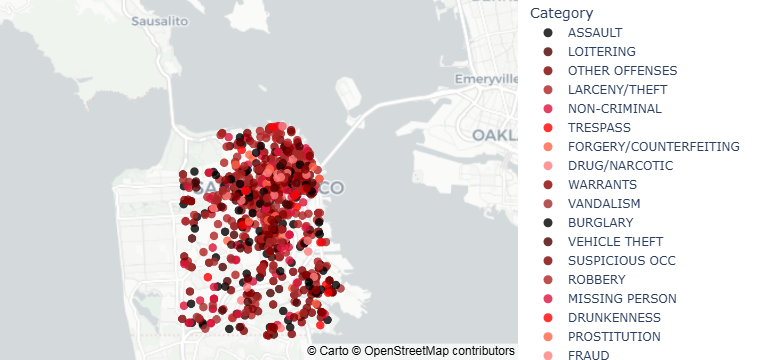

In [59]:
# Filter valid coordinates
df_map = df_vis[(df_vis['Latitude'].between(37.7, 37.82)) & (df_vis['Longitude'].between(-122.52, -122.36))]

# Sample for performance
sample_df_map = df_map.sample(1000, random_state=1)

# Black & red gradient-style palette
custom_palette = ["#000000","#4B0000", "#800000", "#B22222","#DC143C",  "#FF0000",  "#FF6347","#FF7F7F",  "#8B0000","#A52A2A"]

# Plot
fig = px.scatter_mapbox(
    sample_df_map,
    lat="Latitude",
    lon="Longitude",
    color="Category",
    hover_name="Descript",
    zoom=11,
    height=800,
    mapbox_style="carto-positron",
    color_discrete_sequence=custom_palette
)

fig.update_traces(marker=dict(size=9, opacity=0.8))
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()


## Crime Category Word Cloud  


This word cloud visually represents the frequency of different crime categories in San Francisco. Categories that appear more frequently are shown in larger font sizes. The use of deep red, black, brown, and maroon tones emphasizes the gravity and diversity of criminal activity in the dataset.


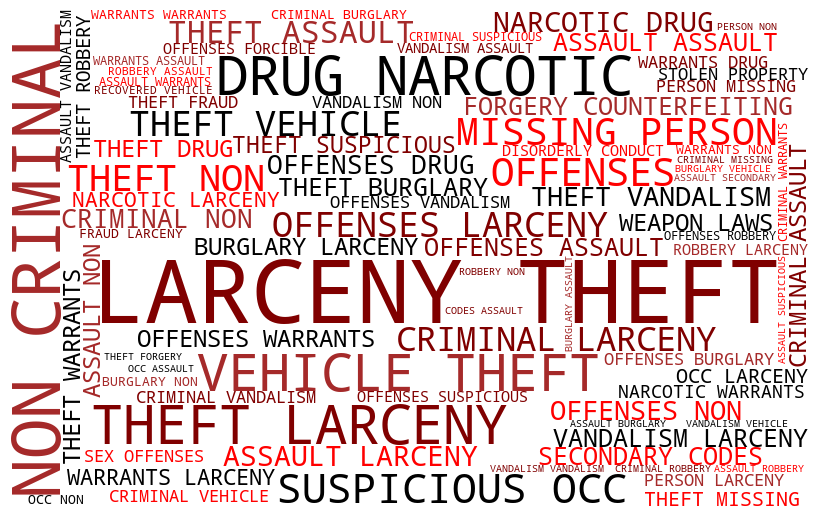

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

# Define a custom color function
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#FF0000',  # red
              '#000000',  # black
              '#A52A2A',  # brown
              '#800000']  # maroon
    return random.choice(colors)

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=500,
    background_color='white',
    min_font_size=10,
    color_func=custom_color_func
).generate(' '.join(df_vis['Category']))

# Display
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


## Pie Chart of Crime Resolutions

Purpose: Show proportions of a whole.Distribution of Top 5 Crime Resolutions by pie chart so this visual helps us understand how frequently different crime outcomes occur,
giving insight into law enforcement actions and how cases are closed.


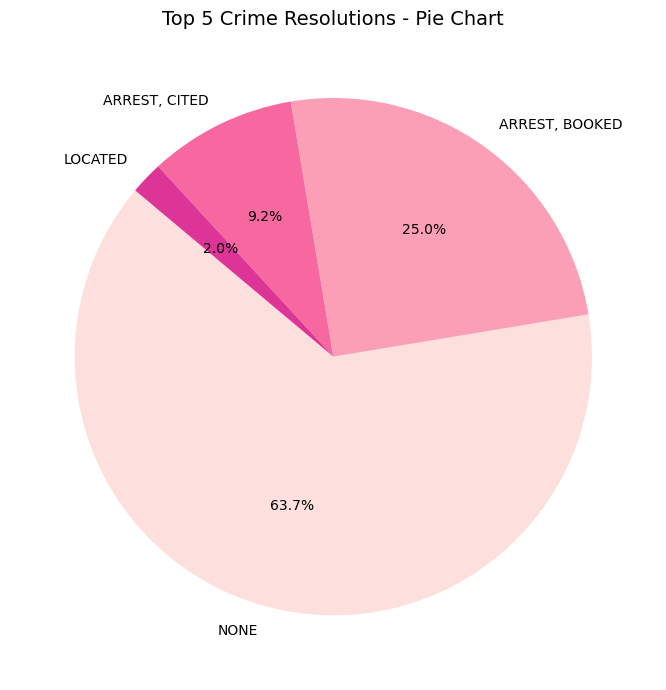

In [61]:
# Get the top 5 most common crime resolutions
top_resolutions = df_train['Resolution'].value_counts().nlargest(4)

# Shades of pink
pink_shades = ['#fde0dd', '#fa9fb5', '#f768a1', '#dd3497', '#ae017e']

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(top_resolutions,
        labels=top_resolutions.index,
        colors=pink_shades,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Top 5 Crime Resolutions - Pie Chart', fontsize=14)
plt.tight_layout()
plt.show()


## STACKED BAR CHART SUBPLOTS: Crime Distribution by Day of the Week (Top 6 Categories)

 Purpose: Compare parts of categories and total size.This version breaks down the crime distribution per day of the week for the top 6 crime categories, showing how certain types of crime may spike on specific days.

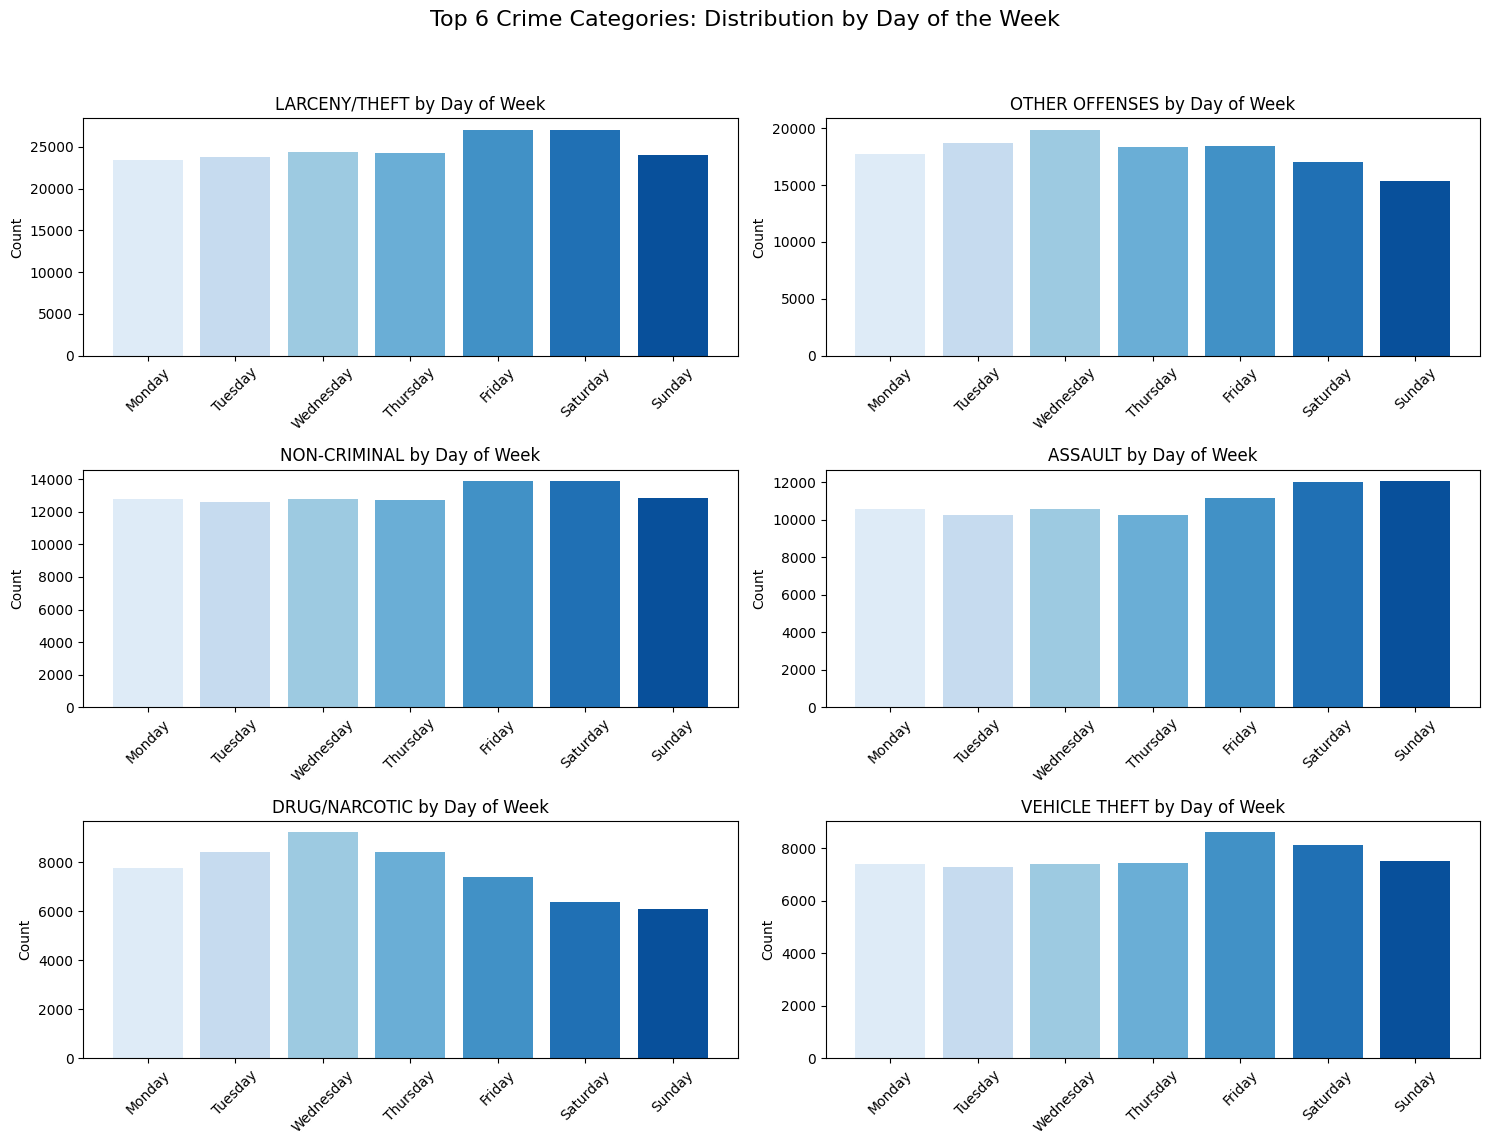

In [ ]:
# Define top 6 categories
top6 = df_train['Category'].value_counts().nlargest(6).index
filtered_df = df_train[df_train['Category'].isin(top6)]

# Define order for days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set color palette - shades of blue
blue_shades = sns.color_palette("Blues", len(days_order))

# Create a figure with subplots for each crime category
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot stacked bars for each category
for i, category in enumerate(top6):
    # Filter for this category
    subset = filtered_df[filtered_df['Category'] == category]

    # Count occurrences by day of week and police district
    day_counts = subset['DayOfWeek'].value_counts().reindex(days_order)

    # Bar chart (as 1-color histogram)
    axes[i].bar(day_counts.index, day_counts.values, color=blue_shades)
    axes[i].set_title(f"{category} by Day of Week", fontsize=12)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Remove the last unused subplot if top6 is not a multiple of 2
for j in range(len(top6), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 6 Crime Categories: Distribution by Day of the Week", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Histogrm : Distribution of Crimes by Police District

Purpose: Show distribution of numerical data.Although histograms are often for continuous data, this bar-style histogram  and allows us to understand frequency distribution across categorical zones (districts).


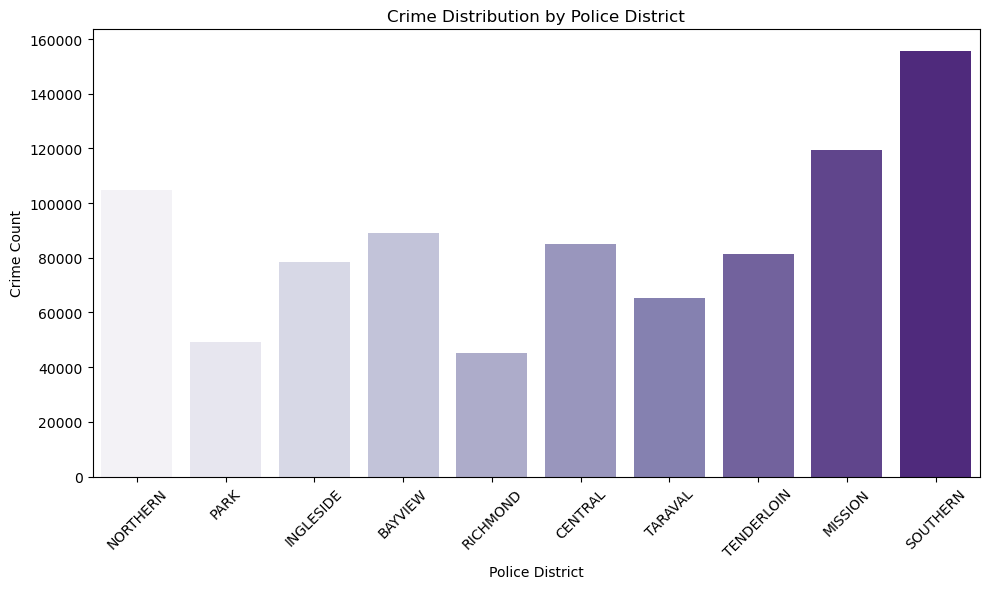

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='PdDistrict', palette='Purples')
plt.title('Crime Distribution by Police District')
plt.xlabel('Police District')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Stacked bar chart Top 8 Crime Resolutions per PdDistrict

Purpose: Compare parts of categories and total size.stacked bar chart used to viusalize top 8 Crime Resolutions per Police District. It shows not only how many crimes occurred per district, but also how those crimes were resolved — all in a compact, comparable view.

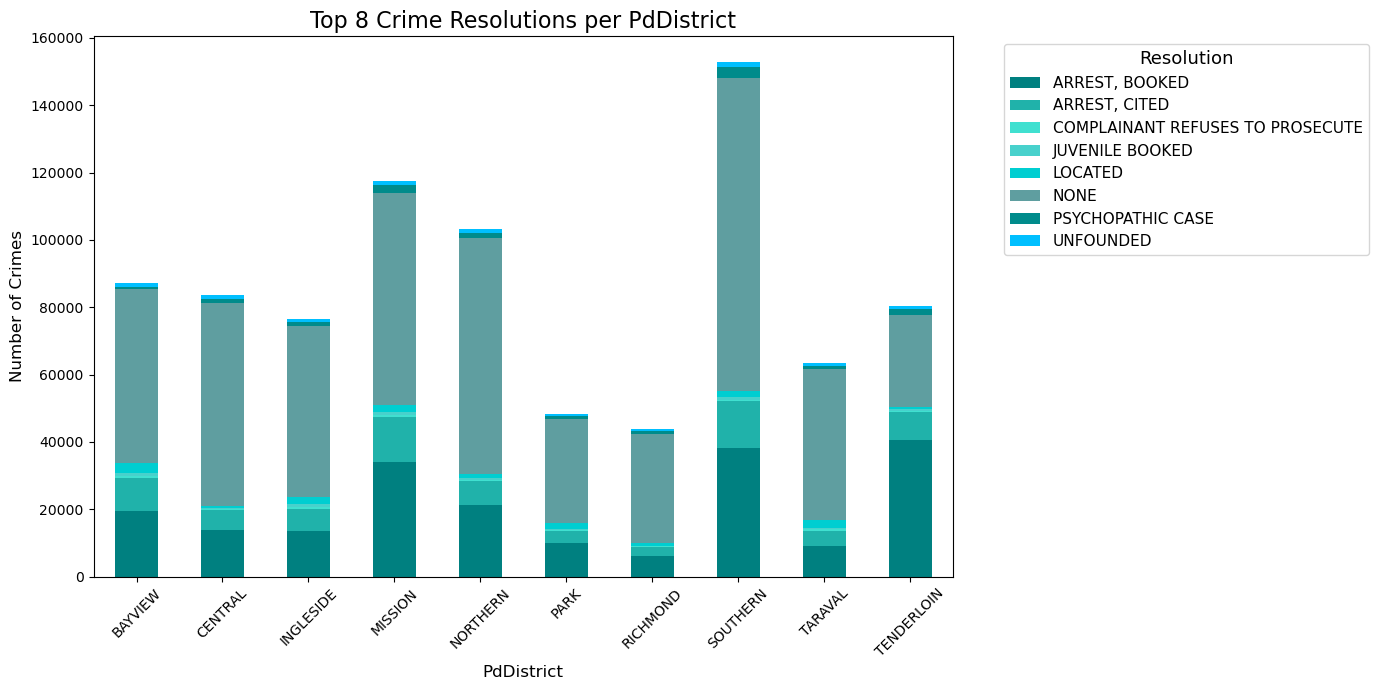

In [63]:
# Get top 8 resolutions
top_res = df_train['Resolution'].value_counts().nlargest(8).index
filtered_df = df_train[df_train['Resolution'].isin(top_res)]

# Create a pivot table: count of resolutions per PdDistrict
pivot_df = filtered_df.pivot_table(index='PdDistrict', columns='Resolution', aggfunc='size', fill_value=0)

# Plot stacked bar chart with shades of teal
colors = ['#008080', '#20B2AA', '#40E0D0', '#48D1CC', '#00CED1', '#5F9EA0', '#008B8B', '#00BFFF']  # Shades of teal

# Increase the figure size for better layout
pivot_df.plot(kind='bar', stacked=True, color=colors, figsize=(14, 7))

# Add labels and title
plt.title('Top 8 Crime Resolutions per PdDistrict', fontsize=16)
plt.xlabel('PdDistrict', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45)

# Adjust the legend position to avoid overlap with the plot
plt.legend(title='Resolution', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Show plot
plt.show()

## Scatter Plot Subplots by Day of the Week

Purpose: Show relationship between two continuous variables.that shows the geographic distribution of crime incidents by Day of the Week for the top 5 crime categories

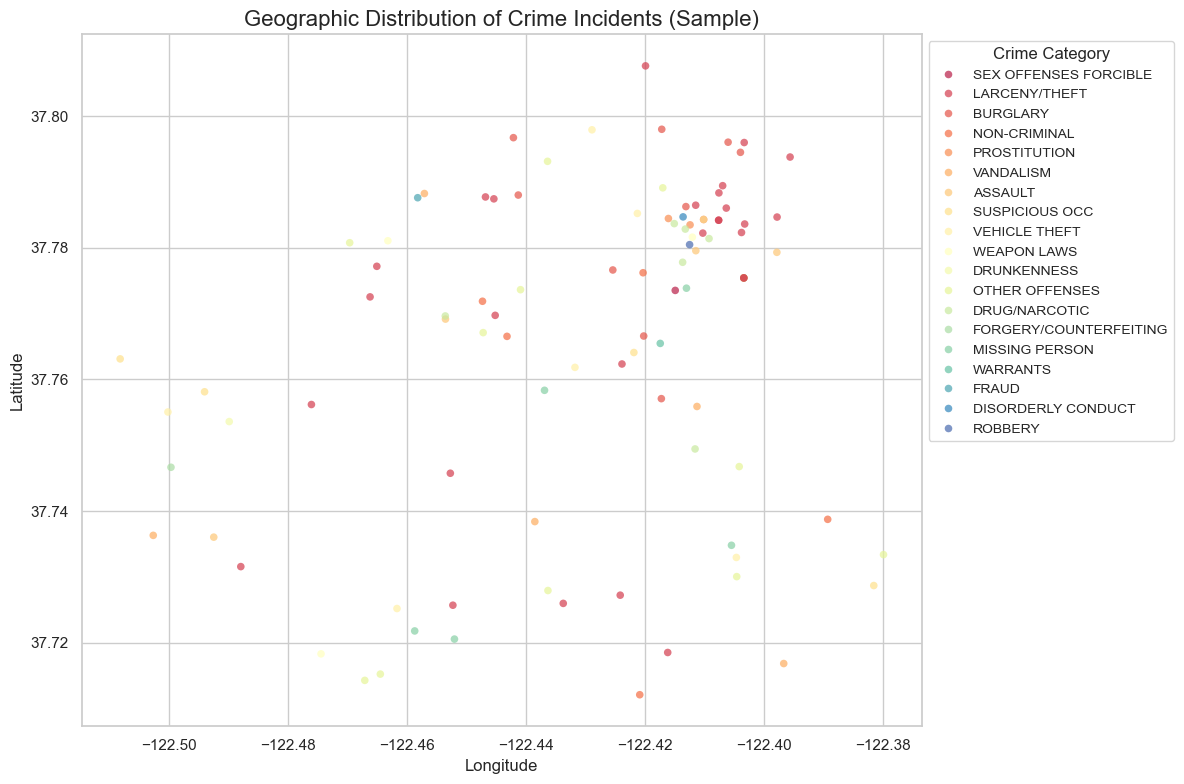

In [64]:
# Sample 100 records from df_train for visualization
df_sample = df_train.sample(n=100, random_state=42)

# Set the seaborn style for beautiful visualization
sns.set(style="whitegrid")

# Plot scatter plot: Longitude vs Latitude, color by Category
plt.figure(figsize=(12, 8))

# Use a categorical palette for categories (shades of color)
palette = sns.color_palette("Spectral", n_colors=df_sample['Category'].nunique())

# Scatter plot with Longitude and Latitude coordinates, color by Category
sns.scatterplot(x='Longitude', y='Latitude', hue='Category', data=df_sample, palette=palette, s=30, edgecolor='none', alpha=0.7)

# Add labels and title
plt.title('Geographic Distribution of Crime Incidents (Sample)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Adjust legend to not cover the plot and make it more compact
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Crime Category', fontsize=10)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# **Data Mining Algorithms**

## **1) Logistic Regression Model:**

In [65]:
df_cleaned_train.head()

Category                      Descript  DayOfWeek PdDistrict  \
0        WARRANTS                WARRANT ARREST  Wednesday   NORTHERN   
1  OTHER OFFENSES      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2  OTHER OFFENSES      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
3   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
4   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   

       Resolution                    Address   Longitude   Latitude  Year  \
0  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892  37.774599  2015   
1  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892  37.774599  2015   
2  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363  37.800414  2015   
3            NONE   1500 Block of LOMBARD ST -122.426995  37.800873  2015   
4            NONE  100 Block of BRODERICK ST -122.438738  37.771541  2015   

   Month  Day  Hour  
0      5   13    23  
1      5   13    23  
2      5   13    23  
3      5   13    23  
4      5   13    23

In [66]:
df_cleaned_train['PdDistrict'].value_counts()

PdDistrict
SOUTHERN      154139
MISSION       119321
NORTHERN      104703
BAYVIEW        88887
CENTRAL        85095
TENDERLOIN     81363
INGLESIDE      78623
PARK           49012
RICHMOND       26489
TARAVAL        25710
Name: count, dtype: int64

In [67]:
df_cleaned_test.head()

Id DayOfWeek PdDistrict                   Address   Longitude   Latitude  \
0   0    Sunday    BAYVIEW   2000 Block of THOMAS AV -122.399588  37.735051   
1   1    Sunday    BAYVIEW        3RD ST / REVERE AV -122.391523  37.732432   
2   2    Sunday   NORTHERN    2000 Block of GOUGH ST -122.426002  37.792212   
3   3    Sunday  INGLESIDE  4700 Block of MISSION ST -122.437394  37.721412   
4   4    Sunday  INGLESIDE  4700 Block of MISSION ST -122.437394  37.721412   

   Year  Month  Day  Hour  
0  2015      5   10    23  
1  2015      5   10    23  
2  2015      5   10    23  
3  2015      5   10    23  
4  2015      5   10    23

In [68]:
# Remove columns not needed in our prediction
df_cleaned_train1 = df_cleaned_train.drop(['Descript', 'Resolution', 'Category'], axis=1)

In [69]:
df_cleaned_train1.head()

DayOfWeek PdDistrict                    Address   Longitude   Latitude  \
0  Wednesday   NORTHERN         OAK ST / LAGUNA ST -122.425892  37.774599   
1  Wednesday   NORTHERN         OAK ST / LAGUNA ST -122.425892  37.774599   
2  Wednesday   NORTHERN  VANNESS AV / GREENWICH ST -122.424363  37.800414   
3  Wednesday   NORTHERN   1500 Block of LOMBARD ST -122.426995  37.800873   
4  Wednesday       PARK  100 Block of BRODERICK ST -122.438738  37.771541   

   Year  Month  Day  Hour  
0  2015      5   13    23  
1  2015      5   13    23  
2  2015      5   13    23  
3  2015      5   13    23  
4  2015      5   13    23

### **Importing Required Libraries:**

In [70]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### **Encoding Categorical Columns in Train & Test Datasets:**

In [71]:
label_encoders = {}
categorical_cols_train = df_cleaned_train1.select_dtypes(include='object').columns
categorical_cols_test = df_cleaned_test.select_dtypes(include='object').columns
common_categorical_cols = list(set(categorical_cols_train) & set(categorical_cols_test))

for column in common_categorical_cols:
    label_encoders[column] = LabelEncoder()
    # fit on combined data to ensure consistent encoding
    combined_data = pd.concat([df_cleaned_train1[column], df_cleaned_test[column]], axis=0)
    label_encoders[column].fit(combined_data)
    df_cleaned_train1[column + '_encoded'] = label_encoders[column].transform(df_cleaned_train1[column])
    df_cleaned_test[column + '_encoded'] = label_encoders[column].transform(df_cleaned_test[column])

### **Show Correlation between Columns:**

In [72]:
numerical_features = df_cleaned_train1.select_dtypes(include=['number']).columns
corr_matrix = df_cleaned_train1[numerical_features].corr()
corr_matrix

Longitude  Latitude      Year     Month       Day  \
Longitude            1.000000  0.081704  0.006266  0.000999 -0.000338   
Latitude             0.081704  1.000000  0.025892  0.005158  0.003486   
Year                 0.006266  0.025892  1.000000 -0.047175 -0.009351   
Month                0.000999  0.005158 -0.047175  1.000000  0.017167   
Day                 -0.000338  0.003486 -0.009351  0.017167  1.000000   
Hour                 0.001147 -0.011404 -0.006017 -0.001924  0.016013   
PdDistrict_encoded  -0.208679  0.359924  0.008022  0.001106 -0.000954   
DayOfWeek_encoded   -0.001101 -0.006374 -0.006679 -0.006514 -0.004910   
Address_encoded     -0.000310  0.107814 -0.010147  0.002752  0.006095   

                        Hour  PdDistrict_encoded  DayOfWeek_encoded  \
Longitude           0.001147           -0.208679          -0.001101   
Latitude           -0.011404            0.359924          -0.006374   
Year               -0.006017            0.008022          -0.006679   
Month              -0.001924            0.001106          -0.006514   
Day                 0.016013           -0.000954          -0.004910   
Hour                1.000000            0.007309          -0.001731   
PdDistrict_encoded  0.007309            1.000000           0.010210   
DayOfWeek_encoded  -0.001731            0.010210           1.000000   
Address_encoded     0.029483            0.006585           0.000697   

                    Address_encoded  
Longitude                 -0.000310  
Latitude                   0.107814  
Year                      -0.010147  
Month                      0.002752  
Day                        0.006095  
Hour                       0.029483  
PdDistrict_encoded         0.006585  
DayOfWeek_encoded          0.000697  
Address_encoded            1.000000

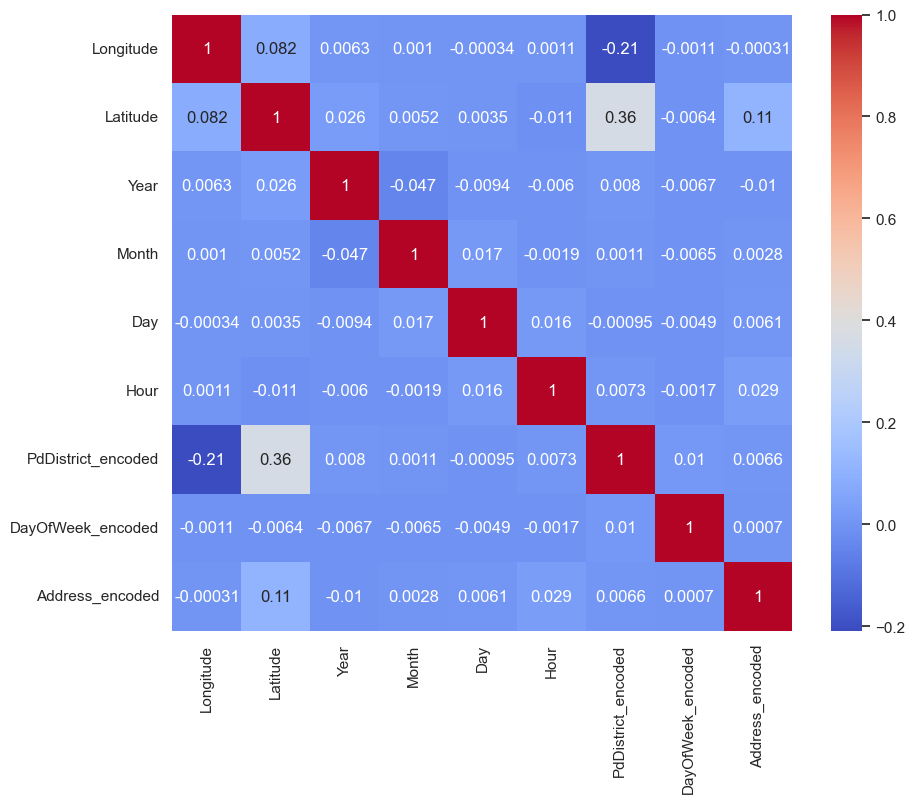

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

> We know that 'Longitude' & 'Latitude' are the most correlated columns with 'PdDistrict_encoded' column (our target prediction).

### **Feature Selection:**

In [74]:
features = ['Longitude','Latitude']
target = 'PdDistrict_encoded'

In [75]:
label_encoders['PdDistrict'] = LabelEncoder()
df_cleaned_train1['PdDistrict_encoded'] = label_encoders['PdDistrict'].fit_transform(df_cleaned_train1['PdDistrict'])
df_cleaned_test['PdDistrict_encoded'] = label_encoders['PdDistrict'].transform(df_cleaned_test['PdDistrict'])

### **Split Data into x_train , y_train , x_test , y_test:**

In [76]:
y_train = df_cleaned_train1[target]
x_train = df_cleaned_train1[features]
y_train = y_train[x_train.index]
x_test = df_cleaned_test[features]
y_test = df_cleaned_test[target][x_test.index]

In [77]:
x_train.shape

(813342, 2)

In [78]:
x_test.shape

(823506, 2)

### **Feature Scaling for x_train & x_test:**

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [80]:
x_train

array([[0.45329131, 0.59519787],
       [0.45329131, 0.59519787],
       [0.46834011, 0.825497  ],
       ...,
       [0.67479829, 0.64575236],
       [0.80138468, 0.64879884],
       [0.75812638, 0.270593  ]])

In [81]:
x_test

array([[0.71223278, 0.24239827],
       [0.79162417, 0.21903785],
       [0.45220549, 0.75232895],
       ...,
       [0.4586997 , 0.75651214],
       [0.2610688 , 0.03743008],
       [0.83226885, 0.28190228]])

In [82]:
y_train.head()

0    4
1    4
2    4
3    4
4    5
Name: PdDistrict_encoded, dtype: int32

In [83]:
y_test.head()

0    0
1    0
2    4
3    2
4    2
Name: PdDistrict_encoded, dtype: int32

### **Fit the Logistic Regression Model on training dataset(x_train & y_train):**

In [84]:
model = LogisticRegression(multi_class='multinomial', max_iter=300, random_state=42, solver='lbfgs')

In [87]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=300, multi_class='multinomial', random_state=42)

In [88]:
# Get the coefficients of the model
model.coef_

array([[  77.20032344,  -68.37173433],
       [  23.27745683,   89.30119338],
       [  27.20854743,  -79.88464783],
       [  32.99481639,  -53.46452687],
       [ -23.39758454,   56.65147607],
       [ -49.1403213 ,   25.49986433],
       [ -64.77058732,   54.09329253],
       [  58.92311205,   -6.47853103],
       [-105.73882558,  -54.29874188],
       [  23.44306261,   36.95235561]])

In [89]:
# Get the interceptions of the model
model.intercept_

array([ -0.16881914, -63.67493002,  33.84576514,  22.35354817,
       -14.57984553,  13.61962258,  -1.10594605, -18.64837194,
        54.7614401 , -26.40246331])

In [90]:
# Get the probability of predicting each row in x_train for each value in y_train (PdDistrict values)
model.predict_proba(x_train)

array([[4.29474384e-07, 1.56416111e-04, 3.87097745e-05, ...,
        1.01889155e-02, 1.29669844e-15, 7.62778260e-02],
       [4.29474384e-07, 1.56416111e-04, 3.87097745e-05, ...,
        1.01889155e-02, 1.29669844e-15, 7.62778260e-02],
       [4.50343481e-19, 4.29085347e-01, 1.34960236e-18, ...,
        1.25803900e-08, 2.21499867e-27, 1.21880847e-03],
       ...,
       [1.02851493e-04, 7.04706947e-04, 8.03803341e-08, ...,
        9.72849208e-01, 1.59397401e-30, 2.52760793e-02],
       [8.84161291e-04, 1.06289591e-05, 1.19097290e-09, ...,
        9.98738363e-01, 1.25372114e-39, 3.31921190e-04],
       [9.98140404e-01, 1.56309566e-27, 9.09446131e-04, ...,
        1.69572946e-07, 1.88878805e-35, 1.92245909e-17]])

In [91]:
# Get the probability of predicting each row in x_test for each value in y_train (PdDistrict values)
model.predict_proba(x_test)

array([[9.83037117e-01, 2.14507496e-28, 1.22894272e-02, ...,
        6.74765925e-08, 5.53938895e-32, 1.14555305e-17],
       [9.99590693e-01, 7.58291311e-32, 3.08963545e-04, ...,
        3.78700555e-09, 1.99680608e-38, 1.39384150e-20],
       [1.41096005e-15, 3.13379780e-02, 2.19946851e-14, ...,
        5.71463456e-07, 4.74286905e-23, 4.09038429e-03],
       ...,
       [1.57909712e-15, 4.77893036e-02, 1.69550552e-14, ...,
        7.35829141e-07, 1.71609237e-23, 5.01634100e-03],
       [1.21018953e-09, 8.94881723e-41, 9.99873035e-01, ...,
        9.79755696e-19, 2.66533447e-06, 2.02676280e-25],
       [9.99937773e-01, 1.70957455e-28, 1.96468740e-05, ...,
        8.82286734e-08, 2.85433673e-41, 1.17754570e-18]])

In [93]:
# Get the y predicted encoded from x_test
y_pred_encoded = model.predict(x_test)
y_pred_encoded

array([0, 0, 4, ..., 4, 2, 0])

In [94]:
# Transform encoded y_test & encoded y_pred_encoded into their original values (object)
predicted_pddistrict = label_encoders['PdDistrict'].inverse_transform(y_pred_encoded)
print("\nFirst 20 Predicted PdDistricts:")
print(predicted_pddistrict[:20])

actual_pddistrict = label_encoders['PdDistrict'].inverse_transform(y_test)
print("\nFirst 20 Actual PdDistricts:")
print(actual_pddistrict[:20])


First 20 Predicted PdDistricts:
['BAYVIEW' 'BAYVIEW' 'NORTHERN' 'INGLESIDE' 'INGLESIDE' 'TARAVAL'
 'INGLESIDE' 'INGLESIDE' 'MISSION' 'CENTRAL' 'MISSION' 'MISSION' 'MISSION'
 'CENTRAL' 'CENTRAL' 'TENDERLOIN' 'TARAVAL' 'BAYVIEW' 'NORTHERN'
 'NORTHERN']

First 20 Actual PdDistricts:
['BAYVIEW' 'BAYVIEW' 'NORTHERN' 'INGLESIDE' 'INGLESIDE' 'TARAVAL'
 'INGLESIDE' 'INGLESIDE' 'MISSION' 'CENTRAL' 'INGLESIDE' 'MISSION'
 'MISSION' 'CENTRAL' 'CENTRAL' 'TENDERLOIN' 'TARAVAL' 'INGLESIDE'
 'NORTHERN' 'NORTHERN']


In [95]:
model.score(x_test, y_test)

0.8827124513968325

## **Classification's Evaluation metrics**

In [96]:
#import the metrics
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, classification_report

### **Confusion Matrix:**

*A confusion matrix is used to evaluate the performance of a classification model.
In short, it shows how many times the model's predictions were correct and wrong, broken down by each class.*

  For each class:

True Positive (TP): Model correctly predicted that class.

False Positive (FP): Model predicted this class, but it was actually a different class.

False Negative (FN): Model missed this class — it predicted something else instead.

True Negative (TN): Model correctly predicted something else (not this class).



In [97]:
confusion_matrix(actual_pddistrict, predicted_pddistrict)

array([[ 82485,     16,   4201,    477,     25,     43,      9,   2254,
             2,     16],
       [     0,  71897,      6,      0,   5224,      0,      3,    846,
             0,   8149],
       [  3203,      0,  69766,   4445,      0,      1,      0,      0,
          2664,      0],
       [  2214,      0,    535, 114741,      0,   1776,      0,   1179,
             1,      0],
       [     0,   2046,      0,   1543,  94172,   2199,   1832,    596,
             0,   4496],
       [    76,      0,    224,    258,   5689,  40694,   1236,     69,
          1922,      0],
       [     0,    120,      1,      0,   4513,   1001,  20917,      0,
             1,      0],
       [    37,   2986,    117,   5926,      8,      0,      9, 146015,
             0,    868],
       [     0,      0,   2821,     17,      0,   2106,      0,      0,
         21085,      0],
       [     8,     87,      0,      0,   1218,      0,     10,  15258,
             0,  65147]], dtype=int64)


Confusion Matrix (Predicting PdDistrict):


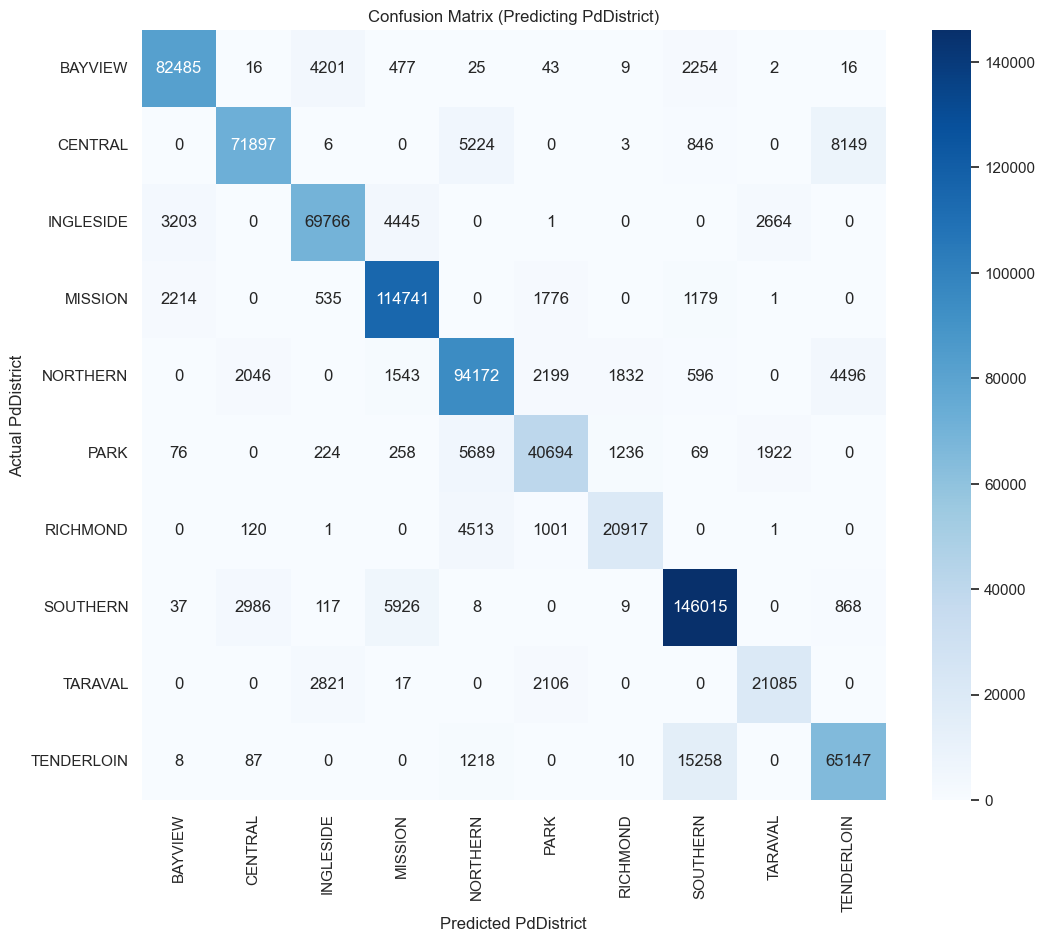

In [98]:
# Visualization of the confusion matrix
print("\nConfusion Matrix (Predicting PdDistrict):")
cm = confusion_matrix(actual_pddistrict, predicted_pddistrict,
                        labels=label_encoders['PdDistrict'].classes_) # Use class names for labels
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['PdDistrict'].classes_,
            yticklabels=label_encoders['PdDistrict'].classes_)
plt.xlabel('Predicted PdDistrict')
plt.ylabel('Actual PdDistrict')
plt.title('Confusion Matrix (Predicting PdDistrict)')
plt.show()

### **Accuracy**
*Model accuracy expresses the percentage of correct predictions made by the model out of all predictions.*

In [99]:
accuracy = accuracy_score(actual_pddistrict, predicted_pddistrict)
print(f"The Accuracy of the model is :{round((accuracy*100),2)} %")

The Accuracy of the model is :88.27 %


### **Precision**
*Among the predicted positives, how many were actually positive.*

In [100]:
from sklearn.metrics import precision_score
precision=precision_score(actual_pddistrict, predicted_pddistrict, average='weighted')
print(f"The Precision of the model is :{round((precision*100),2)} %")

The Precision of the model is :88.31 %


### **Recall (Sensitivity)**
*Among the actual positives, how many were correctly found.*

In [101]:
recall=recall_score(actual_pddistrict, predicted_pddistrict, average='weighted')
print(f"The Recall of the model is :{round((recall*100),2)} %")

The Recall of the model is :88.27 %


### **F1-Score**
*Balance between precision and recall.*

In [102]:
f1=f1_score(actual_pddistrict, predicted_pddistrict, average='weighted')
print(f"The Recall of the model is :{round((f1*100),2)} %")

The Recall of the model is :88.22 %


### **Classification Report**
*A classification report is a summary table that shows key metrics (precision, recall, F1-score, and support) for each class.
It gives  detailed evaluation results for how well the model performed class by class.*

In [105]:
print(classification_report(actual_pddistrict, predicted_pddistrict))

              precision    recall  f1-score   support

     BAYVIEW       0.94      0.92      0.93     89528
     CENTRAL       0.93      0.83      0.88     86125
   INGLESIDE       0.90      0.87      0.88     80079
     MISSION       0.90      0.95      0.93    120446
    NORTHERN       0.85      0.88      0.87    106884
        PARK       0.85      0.81      0.83     50168
    RICHMOND       0.87      0.79      0.83     26553
    SOUTHERN       0.88      0.94      0.91    155966
     TARAVAL       0.82      0.81      0.82     26029
  TENDERLOIN       0.83      0.80      0.81     81728

    accuracy                           0.88    823506
   macro avg       0.88      0.86      0.87    823506
weighted avg       0.88      0.88      0.88    823506



## **2) K_Medoids**

In [142]:
kmed_data = df_cleaned_train[['Category', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Longitude', 'Latitude']].sample(n= 20000, random_state=0).copy()
# choose 20,000 sample to apply k-medoids algorithm and to ensure that it will be the same in each run we use random_state=0 (0 as key of this sample)
kmed_data = kmed_data.reset_index(drop=True)

# Select the most important features that define similarity for good clustering

In [143]:
kmed_data.head()

Category DayOfWeek PdDistrict      Resolution   Longitude   Latitude
0   LARCENY/THEFT    Friday    MISSION            NONE -122.424525  37.769146
1    NON-CRIMINAL  Thursday   NORTHERN            NONE -122.432612  37.778579
2   LARCENY/THEFT    Friday    MISSION            NONE -122.419520  37.764229
3     DRUNKENNESS    Sunday    MISSION  ARREST, BOOKED -122.409770  37.759195
4  OTHER OFFENSES    Monday    BAYVIEW   ARREST, CITED -122.389944  37.732002

In [144]:
kmed_data.shape

(20000, 6)

In [121]:
pip install gower


Note: you may need to restart the kernel to use updated packages.


In [145]:
import gower

gower_dist = gower.gower_matrix(kmed_data)

In [146]:
gower_dist

array([[0.        , 0.5274122 , 0.01559573, ..., 0.5513214 , 0.3685379 ,
        0.7189823 ],
       [0.5274122 , 0.        , 0.5430079 , ..., 0.71733654, 0.56261677,
        0.71833074],
       [0.01559573, 0.5430079 , 0.        , ..., 0.55035484, 0.35294217,
        0.7180157 ],
       ...,
       [0.5513214 , 0.71733654, 0.55035484, ..., 0.        , 0.7330822 ,
        0.5015538 ],
       [0.3685379 , 0.56261677, 0.35294217, ..., 0.7330822 , 0.        ,
        0.7340764 ],
       [0.7189823 , 0.71833074, 0.7180157 , ..., 0.5015538 , 0.7340764 ,
        0.        ]], dtype=float32)

In [147]:
sample=gower.gower_matrix(kmed_data.sample(10000 , random_state=42))

In [148]:
sample

array([[0.        , 0.7937178 , 0.6178768 , ..., 0.7791389 , 0.7943672 ,
        0.8621341 ],
       [0.7937178 , 0.        , 0.50917435, ..., 0.733624  , 0.67999876,
        0.6257976 ],
       [0.6178768 , 0.50917435, 0.        , ..., 0.5677937 , 0.67916226,
        0.7916278 ],
       ...,
       [0.7791389 , 0.733624  , 0.5677937 , ..., 0.        , 0.74695605,
        0.8594216 ],
       [0.7943672 , 0.67999876, 0.67916226, ..., 0.74695605, 0.        ,
        0.77913225],
       [0.8621341 , 0.6257976 , 0.7916278 , ..., 0.8594216 , 0.77913225,
        0.        ]], dtype=float32)

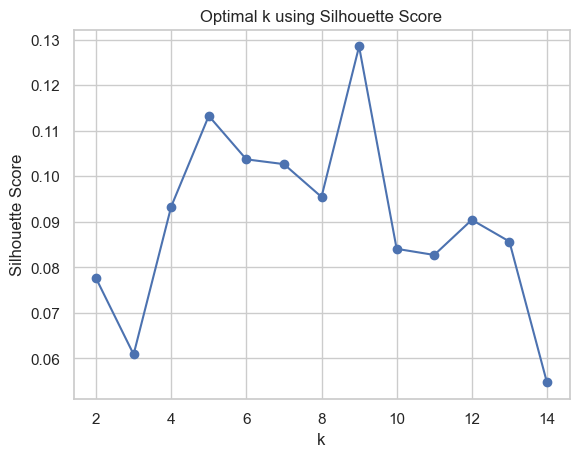

In [149]:
from sklearn.metrics import silhouette_score

k_values = range(2,15)
sil_scores = []

for k in k_values:
     kmedoid = KMedoids(n_clusters=k, metric='precomputed', random_state=42).fit(sample)
     # we We use metric='precomputed' to avoid recalculating distances 
     score = silhouette_score(sample, kmedoid.labels_, metric='precomputed')
     # 'silhouette_score' measures how well each data point fits within its assigned cluster compared to other clusters
     sil_scores.append(score)

plt.plot(k_values , sil_scores , marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Optimal k using Silhouette Score')
plt.show()

In [151]:
# we choose the k with highest score which means Points are closer to their own cluster center and far from other cluster centers
k = k_values[sil_scores.index(max(sil_scores))]
kmedoid = KMedoids(n_clusters=k , metric='precomputed').fit(gower_dist)
labels = kmedoid.labels_

In [152]:
print(labels)

[3 3 3 ... 6 2 5]


In [153]:
indices = kmedoid.medoid_indices_  # to get the index of each medoid
medoids = kmed_data.iloc[indices]  # reach to medoid from its index

In [154]:
medoids

Category  DayOfWeek  PdDistrict      Resolution   Longitude  \
19028  OTHER OFFENSES  Wednesday    SOUTHERN            NONE -122.415065   
5587    LARCENY/THEFT  Wednesday     MISSION            NONE -122.407608   
8869    LARCENY/THEFT  Wednesday     MISSION            NONE -122.420507   
12814   LARCENY/THEFT     Friday     MISSION            NONE -122.435188   
17959   LARCENY/THEFT     Friday    SOUTHERN            NONE -122.412273   
4794         WARRANTS     Friday  TENDERLOIN  ARREST, BOOKED -122.414901   
15791   LARCENY/THEFT   Saturday    SOUTHERN            NONE -122.406346   
10623  OTHER OFFENSES     Friday     BAYVIEW            NONE -122.392084   
8384    LARCENY/THEFT  Wednesday     CENTRAL            NONE -122.412104   

        Latitude  
19028  37.776435  
5587   37.756896  
8869   37.750505  
12814  37.762670  
17959  37.780204  
4794   37.782742  
15791  37.779167  
10623  37.737399  
8384   37.795281

In [155]:
kmed_data['labels'] = labels

In [156]:
kmed_data.head(10)

Category DayOfWeek  PdDistrict      Resolution   Longitude  \
0   LARCENY/THEFT    Friday     MISSION            NONE -122.424525   
1    NON-CRIMINAL  Thursday    NORTHERN            NONE -122.432612   
2   LARCENY/THEFT    Friday     MISSION            NONE -122.419520   
3     DRUNKENNESS    Sunday     MISSION  ARREST, BOOKED -122.409770   
4  OTHER OFFENSES    Monday     BAYVIEW   ARREST, CITED -122.389944   
5        WARRANTS    Sunday    RICHMOND  ARREST, BOOKED -122.443156   
6  OTHER OFFENSES   Tuesday     BAYVIEW   ARREST, CITED -122.391435   
7  OTHER OFFENSES    Sunday   INGLESIDE            NONE -122.417108   
8  OTHER OFFENSES  Thursday   INGLESIDE            NONE -122.426999   
9  OTHER OFFENSES   Tuesday  TENDERLOIN  ARREST, BOOKED -122.414056   

    Latitude  labels  
0  37.769146       3  
1  37.778579       3  
2  37.764229       3  
3  37.759195       1  
4  37.732002       7  
5  37.784362       5  
6  37.738127       7  
7  37.712256       7  
8  37.746493       0  
9  37.782793       5

## **K-Medoids' Evaluation Metrics**



### ***Silhouette Score***
The Silhouette Score is used to evaluate the quality of clustering. It measures how similar each point is to its own cluster compared to other clusters.

Range: -1 to 1

Close to 1: The point is well matched to its own cluster and poorly matched to neighboring clusters (good clustering).

Around 0: The point lies between clusters (overlap).

In [157]:
from sklearn.metrics import silhouette_score

sil = silhouette_score(gower_dist, labels, metric='precomputed')
print(f"Silhouette Score: {sil:.4f}")


Silhouette Score: 0.0673


### ***Davies-Bouldin Index***
The Davies-Bouldin Index measures the average similarity between each cluster and its most similar one.

It considers:

Compactness: How tight each cluster is.

Separation: How far apart the clusters are.

**-**Lower values indicate better clustering (more compact and well-separated clusters).

**-**Higher values indicate worse clustering.



In [158]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(gower_dist, labels)
print(f"Davies-Bouldin Score: {db_score:.4f}")


Davies-Bouldin Score: 3.9138
